# MNIST

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import os
import seaborn as sns
import glob
import natsort

In [40]:
def get_concat(foldername, seeds):
    for i, seed in enumerate(seeds):
        if i == 0: data = pd.read_csv(os.path.join(save_path,foldername,"s{}.csv".format(seed)))
        else: 
            try: 
                data = pd.concat([data, pd.read_csv(os.path.join(save_path,foldername,"s{}.csv".format(seed)))])
            except:
                pass
    # print(foldername, len(data))
    return data

def get_concat_glob(paths):
    data_ = []
    for i, path in enumerate(paths):
        data = pd.read_csv(path)
        data["Mode"] = data["mode"] + data["gn"].astype(str)
        if "LR" in path:
            data["LR"] = float(path.split("LR")[1][:3])
        else:
            data["LR"] = 0.1
        if "Exp" in path:
            data["ExpDecay"] = float(path.split("Exp")[1][:5])
        if "G11" in path:
            data["Mode"] = "G11"
            if "Lin" in path:
                data["Decay"] = "GN_Lin"
            elif "Exp" in path:
                data["Mode"] = "G11_Exp"
                data["Decay"] = "GN_Exp"
            else:
                data["Decay"] = "GN_No"
        else:
            data["Decay"] = "No"
        if "G00" in path or "G11" in path or "G01" in path:
             pass
        else:
            continue

        if "G01" in path:
            data["Mode"] = "G01"
        
        if len(data_) == 0: 
            data_ = data
        else: 
            data_ = pd.concat([data_, data])
    return data_

In [41]:
import seaborn as sns
import copy

def load_data():
    datas = list()
    save_path = "../Output/CIFAR100-fedavg-*-N100-*/s[1-9].csv"
    path_list = glob.glob(save_path)
    data_temp = get_concat_glob(path_list)
    data_temp["a1"] = data_temp["a1"] * 100
    data_temp["a3"] = data_temp["a3"] * 100
    data_temp['Distribution'] = data_temp['distribution'] .map({0: "Balanced IID partition", 
                                                0.3: "Balanced Dirichlet partition (α=0.3)", 
                                                })
    data_temp['Mode'] = data_temp['Mode'] .map({'fedavg0': "FedAvg", 
                                                'fedprox0': "FedProx", 
                                                'scaffold0': "Scaffold",  
                                                'feddyn0': "FedDyn", 
                                                'G11': "FedGN",
                                                'G01': "FedGN01",
                                                'G11_Exp': "FedGN_Exp",
                                               })
    print(data_temp["Mode"].unique())
    # sk = ['FedAvg', 'FedProx', 'Scaffold', 'FedDyn', "FedGN", "FedGN+mean"]
    # sk = ['FedAvg', 'FedProx', 'Scaffold', 'FedDyn', "FedGN"]
    # sk = ['FedAvg', 'FedProx', 'Scaffold', 'FedDyn', "FedGN", "FedGN01"]
    sk = ['FedAvg', "FedGN", "FedGN01", "FedGN_Exp"]
    data_temp = data_temp.set_index('Mode').loc[sk].reset_index()
    print(data_temp.size)
    return data_temp

['FedAvg' 'FedGN' 'FedGN_Exp' 'FedGN01']
156975
(900, 23)
(902, 23)


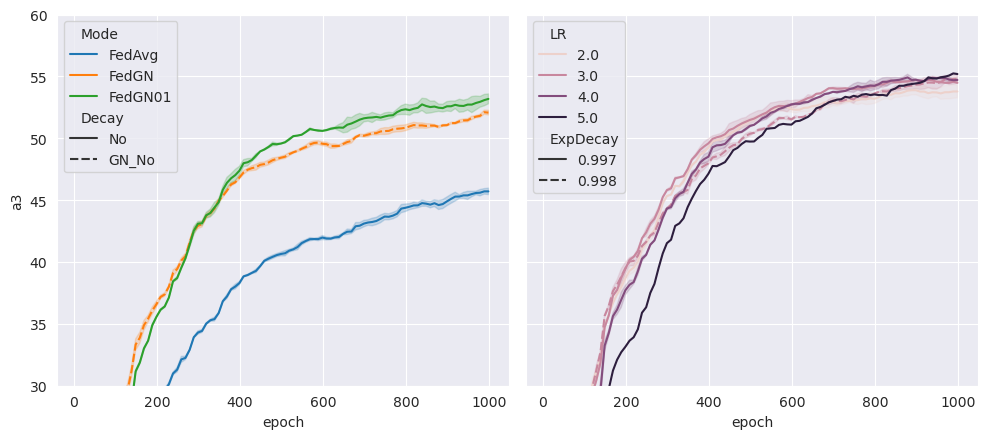

In [54]:
data_temp = load_data()

fig, axes = plt.subplots(1, 2, figsize=(10,4.5), dpi=100, sharey=True)
sns.set_style("darkgrid")
sns.color_palette("tab10")

ax = axes[0]
temp = copy.deepcopy(data_temp)
temp = temp[temp["Distribution"] == "Balanced IID partition"]
temp = temp[temp["act_prob"] == 0.01]
temp = temp[(temp["Mode"]=="FedGN") | (temp["Mode"]=="FedGN01") | (temp["Mode"]=="FedAvg")]
temp = temp[(temp["LR"] == 0.1) | (temp["LR"] == 1.2)]
temp = temp[(temp["Decay"] == "No") | (temp["Decay"] == "GN_No")]
print(temp.shape)
ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Mode", style="Decay", errorbar="se")

ax = axes[1]
sns.color_palette("tab10")
temp = copy.deepcopy(data_temp)
temp = temp[temp["Distribution"] == "Balanced IID partition"]
temp = temp[temp["act_prob"] == 0.01]
temp = temp[(temp["Mode"]=="FedGN_Exp")]
temp = temp[(temp["LR"] >= 2.0)]
temp = temp[(temp["Decay"] == "No") | (temp["Decay"] == "GN_Exp")]
print(temp.shape)
ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="LR", style="ExpDecay", errorbar="se")

ax.set_ylim([30,60])
fig.tight_layout()

In [43]:
temp["ExpDecay"]

5842    0.997
5843    0.997
5844    0.997
5845    0.997
5846    0.997
        ...  
6355    0.997
6356    0.997
6357    0.997
6358    0.997
6359    0.997
Name: ExpDecay, Length: 437, dtype: float64

['FedAvg' 'FedGN' 'FedGN01']
130944
(1900, 22)
(1000, 22)


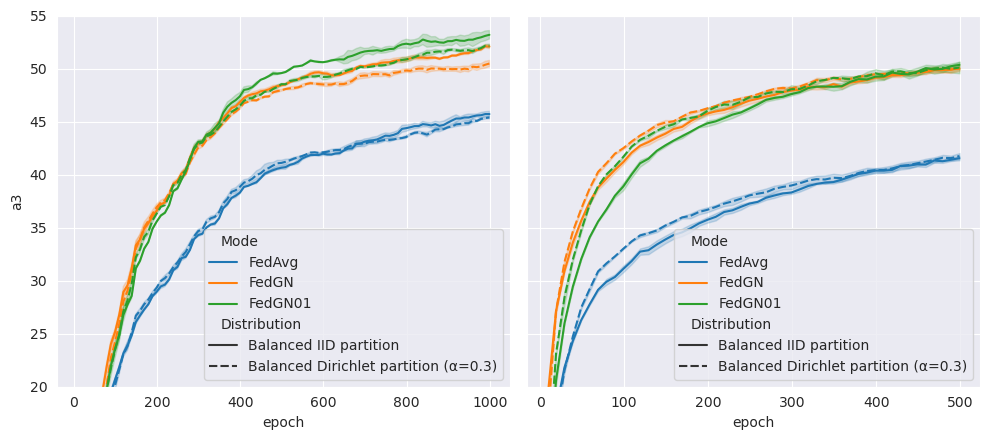

In [10]:
data_temp = load_data()

fig, axes = plt.subplots(1, 2, figsize=(10,4.5), dpi=100, sharey=True)
sns.set_style("darkgrid")
ax = axes[0]
temp = copy.deepcopy(data_temp)
temp = temp[temp["act_prob"] == 0.01]
temp = temp[(temp["Mode"]=="FedGN") | (temp["Mode"]=="FedGN01") | (temp["Mode"]=="FedAvg")]
temp = temp[(temp["LR"] == 0.1) | (temp["LR"] == 1.2)]
temp = temp[(temp["Decay"] == "No") | (temp["Decay"] == "GN_No")]
print(temp.shape)
ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Mode", style="Distribution", errorbar="se")

ax = axes[1]
temp = copy.deepcopy(data_temp)
temp = temp[temp["act_prob"] == 0.1]
temp = temp[(temp["Mode"]=="FedGN") | (temp["Mode"]=="FedGN01") | (temp["Mode"]=="FedAvg")]
temp = temp[(temp["LR"] == 0.1) | (temp["LR"] == 1.2)]
temp = temp[(temp["Decay"] == "No") | (temp["Decay"] == "GN_No")]
print(temp.shape)
ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Mode", style="Distribution", errorbar="se")

ax.set_ylim([20,55])
fig.tight_layout()